In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay


In [2]:
# Load and Prepare the Dataset
# Load dataset
cancer = load_breast_cancer()

# Convert to DataFrame
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['target'] = cancer.target             #   we have set the target like label data

# Preview data
df.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


# Step 4: Explore the Data (EDA)
## Exploratory Data Analysis
Let's explore the data and understand its structure.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

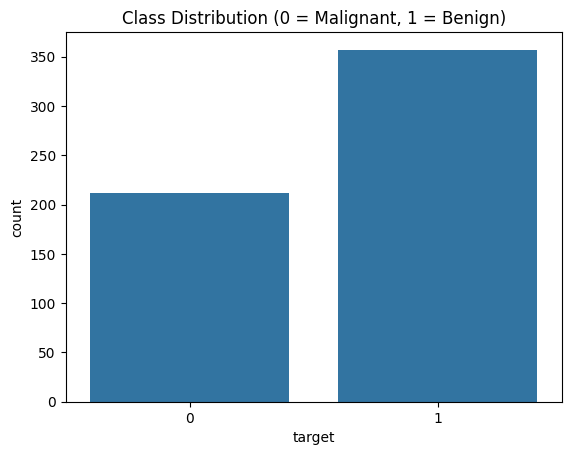

In [3]:
# Basic info
df.info()
df.describe()

# Class distribution
df['target'].value_counts()
sns.countplot(x='target', data=df)
plt.title("Class Distribution (0 = Malignant, 1 = Benign)")  # Malignant= its means cancerous   # Benign= Non-cancerous
plt.show()


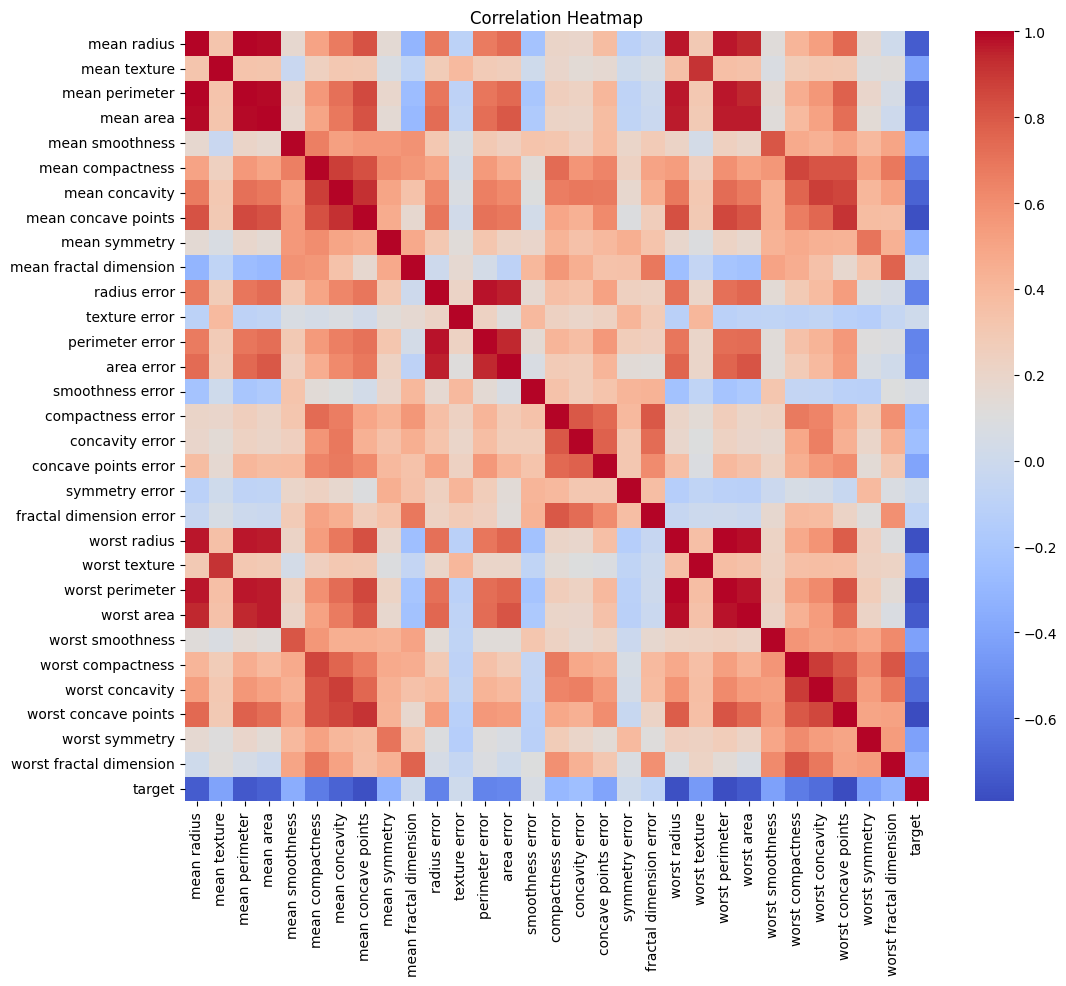

In [4]:
# Correlation heatmap                              # A statistical measure that shows how two variables move together.
plt.figure(figsize=(12,10))                       # set width an height
sns.heatmap(df.corr(), cmap='coolwarm')          # the color map used
plt.title("Correlation Heatmap")
plt.show()


In [5]:
# Step 5: Train-Test Split
X = df.drop('target', axis=1) # REMOVE TARGET COLUMN
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% train data   # 20% test data


In [6]:
# Step 6: Scale the Features
scaler = StandardScaler()                      # Scales features to mean=0 and std=1

X_train_scaled = scaler.fit_transform(X_train) # Transform data in mean std
X_test_scaled = scaler.transform(X_test)


In [7]:
# Step 7: Train the Model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [8]:
# Step 8: Evaluate the Model
y_pred = model.predict(X_test_scaled)           # train model

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))                    # Shows correct vs incorrect predictions in detail
print("\nClassification Report:\n", classification_report(y_test, y_pred))          # Gives precision, recall, f1-score for each class


Accuracy: 0.9736842105263158

Confusion Matrix:
 [[41  2]
 [ 1 70]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



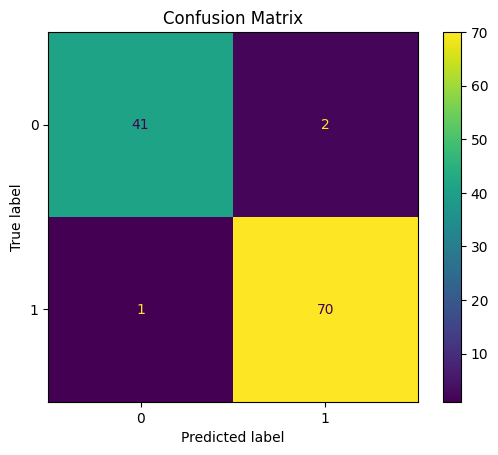

In [9]:
# Step 9: Confusion Matrix Visualization
ConfusionMatrixDisplay.from_estimator(model, X_test_scaled, y_test)  # plot the confusion matrix
plt.title("Confusion Matrix")
plt.show()


# Step 10: Conclusion
## Conclusion

- The logistic regression model achieved high accuracy.
- The dataset is well-balanced and clean.
- This project demonstrates a simple yet effective machine learning workflow using logistic regression for medical diagnosis.

###  Accuracy Achieved: > 95%
